📐 Shape: (705, 13)
🧾 Πρώτες γραμμές:
    Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score R

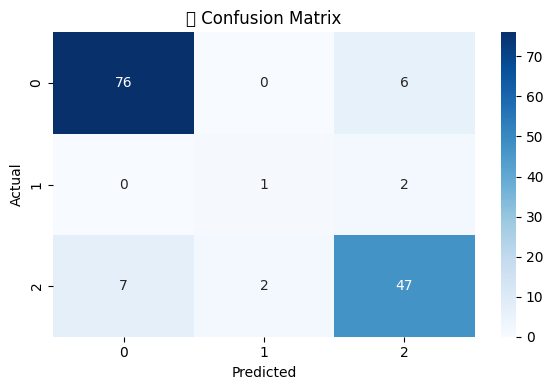

In [ ]:
# -----------------------------------------
# 📦 Βήμα 1: Εισαγωγή Βιβλιοθηκών
# -----------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

# -----------------------------------------
# 📂 Βήμα 2: Φόρτωση Dataset
# -----------------------------------------
url = "https://raw.githubusercontent.com/giwrgoskoutsoudis/AI-Project/main/Students%20Social%20Media%20Addiction.csv"
df = pd.read_csv(url)

# -----------------------------------------
# 👀 Βήμα 3: Εξερεύνηση
# -----------------------------------------
print("📐 Shape:", df.shape)
print("🧾 Πρώτες γραμμές:\n", df.head())
print("\nℹ️ Πληροφορίες:\n")
print(df.info())
print("\n🕳️ Null values:\n", df.isnull().sum())

# -----------------------------------------
# 🧼 Βήμα 4: Καθαρισμός + Target μετατροπή
# -----------------------------------------
def categorize(score):
    if score <= 3:
        return "Low"
    elif score <= 6:
        return "Medium"
    else:
        return "High"

df["Addicted_Level"] = df["Addicted_Score"].apply(categorize)

if "Student_ID" in df.columns:
    df.drop("Student_ID", axis=1, inplace=True)

print("\n📊 Κατανομή Κατηγοριών:\n", df["Addicted_Level"].value_counts())

# -----------------------------------------
# 🔠 Βήμα 5: Κωδικοποίηση Κατηγορικών
# -----------------------------------------
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# -----------------------------------------
# 🎯 Βήμα 6: Επιλογή Features για εκπαίδευση
# -----------------------------------------
selected_features = [
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Affects_Academic_Performance",
    "Conflicts_Over_Social_Media"
]

X = df[selected_features]
y = df["Addicted_Level"]

# -----------------------------------------
# 🧪 Βήμα 7: Train/Test split + SMOTE
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n🔁 Κατανομή μετά το SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# -----------------------------------------
# 🤖 Βήμα 8: Εκπαίδευση Μοντέλου
# -----------------------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------------------
# 📊 Βήμα 9: Αξιολόγηση
# -----------------------------------------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("🔵 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------------------
# 📦 Libraries
# -----------------------------------------
import pandas as pd

# -----------------------------------------
# 🔁 Input Functions
# -----------------------------------------

def get_valid_float(prompt, min_val=0, max_val=12):
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"⛔ Please enter a number between {min_val} and {max_val}.")
        except ValueError:
            print("⛔ Invalid input. Only numbers are allowed.")

def get_valid_yes_no(prompt):
    while True:
        answer = input(prompt).strip().lower()
        if answer in ["yes", "no"]:
            return 1 if answer == "yes" else 0
        else:
            print("⛔ Please answer with 'yes' or 'no'.")

def get_user_input():
    print("💬 Please answer the following questions honestly:")
    print("👉 Note: Use numbers between 0 and 12 (e.g., 2.5, 7.0).")

    usage = get_valid_float("1️⃣ How many hours do you use social media daily? (0–12): ")
    sleep = get_valid_float("2️⃣ How many hours do you sleep every night? (0–12): ")
    academic = get_valid_yes_no("3️⃣ Does social media affect your academic performance? (yes/no): ")
    conflicts = get_valid_yes_no("4️⃣ Do you have conflicts with others because of social media? (yes/no): ")

    return {
        "Avg_Daily_Usage_Hours": usage,
        "Sleep_Hours_Per_Night": sleep,
        "Affects_Academic_Performance": academic,
        "Conflicts_Over_Social_Media": conflicts
    }

# -----------------------------------------
# 🤖 Agent Logic
# -----------------------------------------

def predict_addiction_level(model, input_data: dict):
    label_map = {0: "Low", 1: "Medium", 2: "High"}
    input_df = pd.DataFrame([input_data])

    prediction_encoded = model.predict(input_df)[0]
    prediction = label_map.get(prediction_encoded, "Unknown")

    # 📍 Explanation
    explanation = []
    if input_data["Avg_Daily_Usage_Hours"] > 4:
        explanation.append("Your daily social media usage is high.")
    if input_data["Sleep_Hours_Per_Night"] < 6:
        explanation.append("Your sleep duration is lower than the recommended amount.")
    if input_data["Affects_Academic_Performance"] == 1:
        explanation.append("Your academic performance is affected by social media.")
    if input_data["Conflicts_Over_Social_Media"] == 1:
        explanation.append("You experience conflicts due to social media use.")

    if not explanation:
        explanation.append("No significant risk factors were detected.")

    # 💡 Advice
    advice = []
    if input_data["Avg_Daily_Usage_Hours"] > 4:
        advice.append("Try to reduce your daily social media usage.")
    if input_data["Sleep_Hours_Per_Night"] < 6:
        advice.append("Prioritize sleep — aim for at least 7–8 hours.")
    if input_data["Affects_Academic_Performance"] == 1:
        advice.append("Manage your time better to maintain academic performance.")
    if input_data["Conflicts_Over_Social_Media"] == 1:
        advice.append("Talk to friends or family about setting healthy boundaries.")

    if not advice:
        advice.append("Your social media usage appears balanced. Keep it up!")

    # 🔄 What-if: simulate better sleep
    what_if_data = input_data.copy()
    what_if_data["Sleep_Hours_Per_Night"] = 8
    what_if_pred = model.predict(pd.DataFrame([what_if_data]))[0]
    what_if_label = label_map[what_if_pred]

    if what_if_label != prediction:
        what_if_message = f"❓ If you slept 8 hours, the prediction would change to: **{what_if_label}**"
    else:
        what_if_message = "❓ Even with 8 hours of sleep, the prediction would remain the same."

    # 📝 Report
    report = f"""
📌 **User Report**
Predicted Addiction Level: **{prediction}**

📍 Explanation:
- {'; '.join(explanation)}

💡 Suggestions:
- {'; '.join(advice)}

🔄 What-if Analysis:
- {what_if_message}
"""
    return report.strip()

# -----------------------------------------
# ▶️ Run Agent (Assuming model already trained)
# -----------------------------------------

user_data = get_user_input()
result = predict_addiction_level(model, user_data)

print("\n===========================")
print("📄 Final Report:")
print("===========================\n")
print(result)

💬 Please answer the following questions honestly:
👉 Note: Use numbers between 0 and 12 (e.g., 2.5, 7.0).
1️⃣ How many hours do you use social media daily? (0–12): 2
2️⃣ How many hours do you sleep every night? (0–12): 9
3️⃣ Does social media affect your academic performance? (yes/no): no
4️⃣ Do you have conflicts with others because of social media? (yes/no): no

📄 Final Report:

📌 **User Report**
Predicted Addiction Level: **Medium**

📍 Explanation:
- No significant risk factors were detected.

💡 Suggestions:
- Your social media usage appears balanced. Keep it up!

🔄 What-if Analysis:
- ❓ Even with 8 hours of sleep, the prediction would remain the same.
